## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [43]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

#### Import the CSV Data as Pandas DataFrame

In [3]:
data = pd.read_csv("dataset\kaggle_diabetes.csv")

<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
C:\Users\RAZER BLADE\AppData\Local\Temp\ipykernel_37404\3176666877.py:1: SyntaxWarning: invalid escape sequence '\k'
  data = pd.read_csv("dataset\kaggle_diabetes.csv")


In [61]:
X = data.drop(['Outcome'], axis=1)
Y = data['Outcome']

## Impute to deal with Unbalenced Data

## Splitting data into train and test

In [62]:
X_train,  X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=8)
print('Trainning Shape', X_train.shape, Y_train.shape)
print('Trainning Shape', X_test.shape, Y_test.shape)

Trainning Shape (1600, 8) (1600,)
Trainning Shape (400, 8) (400,)


# Data transformation : Scaling and encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

def data_transformation(X_fit, X_tf):

    # Splitting Data into numerical and categorical
    cat_features = X_fit.select_dtypes(include="object").columns
    num_features = X_fit.select_dtypes(exclude="object").columns
    #print(num_features)
    #print(cat_features)

    # Creating the transformers
    cat_transformer = OneHotEncoder()
    num_transformer = StandardScaler()

    # Creating the preprocessor
    preprocessor = ColumnTransformer(
        [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)

    ]
    )

    X_p = preprocessor.fit(X_fit).transform(X_tf)
    X_p = pd.DataFrame(X_p, columns = X.columns)

    return X_p  

In [64]:
X_train_tf = data_transformation(X_train, X_train)
X_test_tf = data_transformation(X_train, X_test)

#### Create an Evaluate Function to give all metrics after model Training

In [85]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)




def evaluate_model(model, X_train, Y_train, Y_test, Y_pred):

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    #classification_reportt = classification_report(Y_test, Y_pred)
    
    
    
    
    
    
    
    
    return accuracy, precision, recall, f1

[1, 0]

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

models = {'RandomForest': RandomForestClassifier(),
                  'AdaBoost' : AdaBoostClassifier(),
                  'SVM': SVC(),
                  'KNN': KNeighborsClassifier()
                 }


def trainning_models(models, X_train, Y_train):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, Y_train) # Train model

        # Make predictions
        Y_pred = model.predict(X_test)
        
        # Evaluate Train and Test dataset
        accuracy, precision, recall, f1 = evaluate_model(model, X_train, Y_train, Y_test, Y_pred)
        print(model)
        print("Accuracy: {0}".format(accuracy))
        print("Precision: {0}".format(precision))
        print("Recall: {0}".format(recall))
        print("f1: {0}".format(f1))
        
        # Confusion Matrix
        cm = confusion_matrix(Y_test, Y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(Y_test.unique()), yticklabels=list(Y_test.unique()))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top
        plt.gca().xaxis.tick_top()                # Move x-axis ticks to the top
        plt.show()

        print('='*35)
        print('\n')

In [95]:
def Learning_curve(models, X_train, Y_train):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                                cv=5, scoring='f1',
                                                train_sizes=np.linspace(0.1, 1, 10))
        #Learning Curve
        #Learning Curve
        plt.figure()
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
        plt.show()

RandomForestClassifier()
Accuracy: 0.37
Precision: 0.34146341463414637
Recall: 0.9333333333333333
f1: 0.5


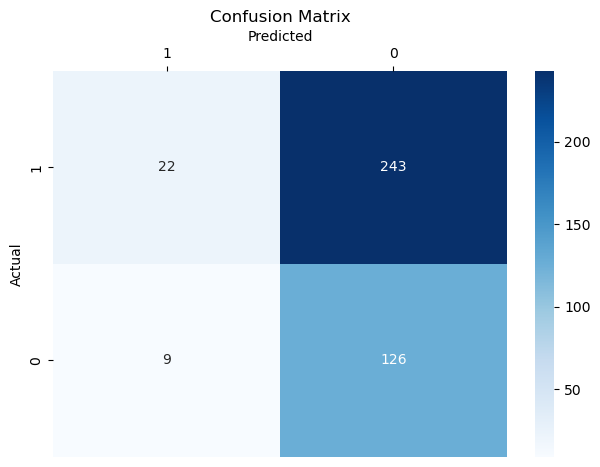



AdaBoostClassifier()
Accuracy: 0.6525
Precision: 0.0
Recall: 0.0
f1: 0.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


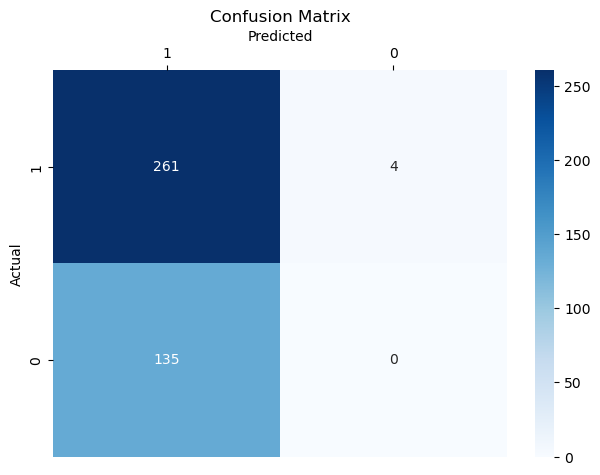



SVC()
Accuracy: 0.6625
Precision: 0.0
Recall: 0.0
f1: 0.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


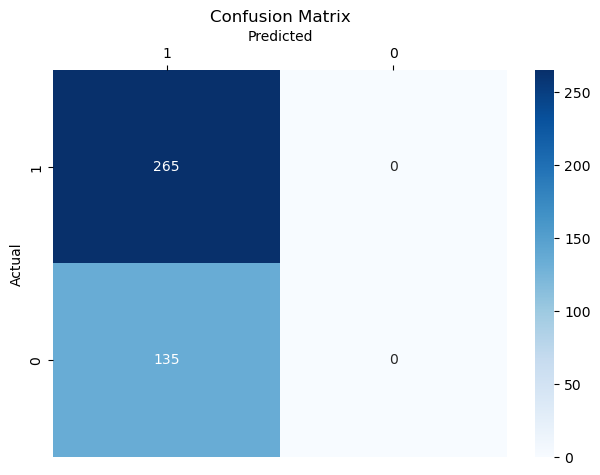



KNeighborsClassifier()
Accuracy: 0.565
Precision: 0.39106145251396646
Recall: 0.5185185185185185
f1: 0.445859872611465


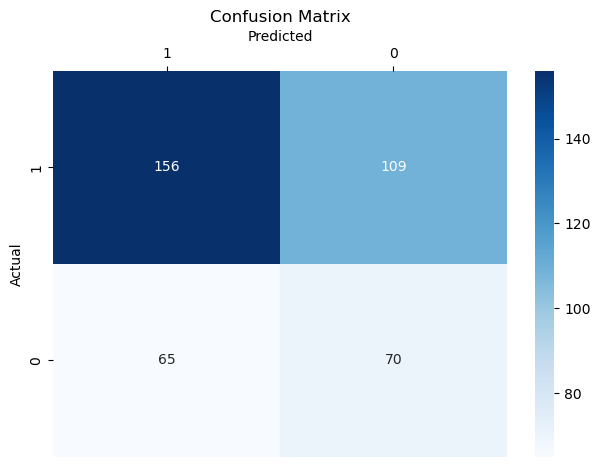

In [100]:
trainning_models(models, X_train_tf, Y_train.to_numpy())

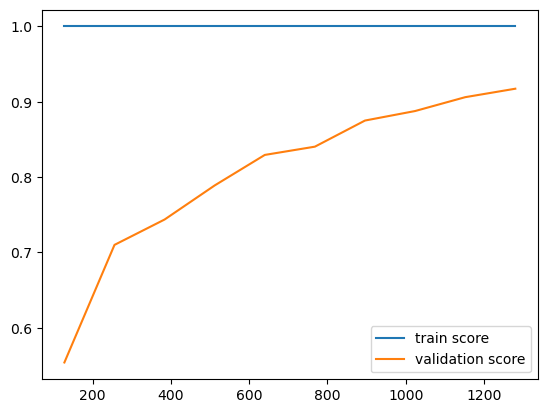

In [93]:
Learning_curve(models, X_train, Y_train.to_numpy())